<a href="https://colab.research.google.com/github/jisusP/MachineLearning/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn
import pandas as pd
ruta = "/content/etanol_metanol_gasolina.xlsx"
df = pd.read_excel(ruta)
df

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=9860292adf5750b4e0ab851756bc53d0f01de7c33d28d2cc28b85f0a1473090d
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


,Unnamed: 0,Methanol,Etanol,Gas,834(1),834(2),834(3),834,835(1),835(2),...,2479,2481,2483,2486,2488,2491,2493,2495,2498,2500
0,METANOL,100.0,0.0,0.0,-0.33862,-0.33866,-0.33867,-0.33860,-0.33861,-0.33862,...,2.82509,2.79669,2.77369,2.73846,2.70282,2.66621,2.63461,2.61122,2.59649,2.56543
1,METANOLA,100.0,0.0,0.0,-0.33093,-0.33098,-0.33094,-0.33087,-0.33090,-0.33091,...,2.84691,2.80658,2.76522,2.73446,2.70467,2.68356,2.66639,2.63928,2.61376,2.57099
2,ETANOL,0.0,100.0,0.0,-0.32299,-0.32306,-0.32303,-0.32297,-0.32299,-0.32300,...,2.87722,2.83780,2.79462,2.76492,2.72422,2.69589,2.67057,2.63601,2.61796,2.58685
3,ETANOLA,0.0,100.0,0.0,-0.32233,-0.32234,-0.32232,-0.32227,-0.32231,-0.32233,...,2.85155,2.82769,2.79065,2.76122,2.73081,2.69421,2.66618,2.64398,2.62231,2.58395
4,GASOLINA,0.0,0.0,100.0,-0.31900,-0.31924,-0.31942,-0.31956,-0.31980,-0.31999,...,2.78439,2.75345,2.70680,2.66352,2.64233,2.61682,2.60014,2.57798,2.53463,2.50223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,M7C,7.0,0.0,93.0,-0.31211,-0.31232,-0.31244,-0.31252,-0.31274,-0.31292,...,2.84653,2.82076,2.79089,2.75683,2.72383,2.69748,2.66299,2.62005,2.59786,2.57569
60,M7.5E5,7.5,5.0,87.5,-0.31112,-0.31129,-0.31142,-0.31151,-0.31168,-0.31183,...,2.84690,2.81019,2.76245,2.73630,2.71421,2.68969,2.66261,2.62405,2.59005,2.56114
61,M7.5E5A,7.5,5.0,87.5,-0.30676,-0.30693,-0.30706,-0.30710,-0.30724,-0.30742,...,2.85358,2.82567,2.78108,2.74546,2.71096,2.68275,2.66826,2.62429,2.58928,2.57607
62,M7.5E5B,7.5,5.0,87.5,-0.30588,-0.30605,-0.30614,-0.30626,-0.30646,-0.30656,...,2.85953,2.83663,2.81060,2.78571,2.75250,2.71349,2.68253,2.64221,2.62418,2.60652


In [4]:
import sklearn
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

x = df.drop(["Unnamed: 0", "Methanol", "Etanol", "Gas"], axis = 1)
y = df.iloc[:,[1,2,3]]
x.columns = x.columns.astype(str)



"""
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)
algoritmo = SVR(kernel="rbf")
algoritmo.fit(x_train, y_train)

composition = algoritmo.predict(x_test)"""

'\npca = PCA(n_components=50)\nx_pca = pca.fit_transform(x)\nx_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)\nalgoritmo = SVR(kernel="rbf")\nalgoritmo.fit(x_train, y_train)\n\ncomposition = algoritmo.predict(x_test)'

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo PLSR
pls_model = PLSRegression(n_components=3)

# Entrenar el modelo
pls_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pls_model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"{pls_model.score}")


Mean Squared Error: 1.9350216437602759
<bound method RegressorMixin.score of PLSRegression(n_components=3)>


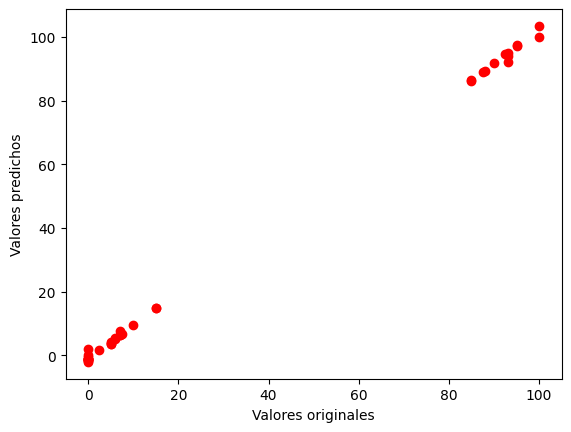

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred, color="red")
plt.xlabel("Valores originales")
plt.ylabel("Valores predichos")
plt.show()


In [5]:
y_pred

array([[  5.08808172,   5.46255385,  89.44936443],
       [  7.6965352 ,   0.12833432,  92.17513049],
       [ 99.87499117,   2.00523904,  -1.88023021],
       [  4.01931054,  -1.28467489,  97.26536435],
       [ -1.41369924,  -2.03808636, 103.45178559],
       [ 14.75926715,  -1.04247865,  86.28321151],
       [ -1.22124754,   9.54565205,  91.67559549],
       [ -1.18491682,   6.37308946,  94.81182737],
       [ -1.23399254,  14.90942809,  86.32456445],
       [  6.76148889,   4.25591655,  88.98259456],
       [  6.37674963,  -0.48859384,  94.1118442 ],
       [ -1.17332216,   3.69223499,  97.48108717],
       [  1.77793428,   3.51274699,  94.70931872]])

In [ ]:
"""y_met = y.iloc[:,0]
y_et = y["Etanol"]
y_gas = y['Gas']"""
#x_met_train, x_met_test, y_met_train, y_met_test = train_test_split(x_pca, y_met, test_size=0.2)
algoritmo = SVC(kernel="rbf")
algoritmo.fit(x_met_train, y_met_train)

composition = algoritmo.predict(x_met_test)